# Sales Data Analysis Project
**Author:** Habiba Khan  
**Assignment:** Data Mining & Visualization  
**Date:** [May 4, 2025]


### 📦 Imports and Display Settings

We begin by importing the necessary libraries for data analysis and visualization:

- **pandas** for data manipulation  
- **matplotlib** and **seaborn** for visualizations  
- **numpy** for numerical operations  
- **sklearn** for machine learning and regression  
- **datetime** for working with date/time formats  
- **warnings** to suppress unnecessary output

We also adjust display settings to ensure all columns are visible in outputs and apply a clean seaborn style for plots.


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style
sns.set(style="darkgrid")


## Q1: Data Loading & Initial Inspection (10 pts)

Load the dataset using Pandas. Display:
- First 5 rows
- Dataset shape
- Column data types
- Summary statistics


📝 **Why I Am Reading the Dataset**
The reason I am reading the dataset is to analyze and extract valuable insights from it. The dataset contains important information about **sales, customers, products, and other related metrics.** By loading the dataset into a pandas DataFrame, I can perform various tasks like data cleaning, exploratory data analysis (EDA), and machine learning to uncover useful business insights.

> ⚠️ **Encoding Issue Explanation**:
However, when loading the dataset, I encountered an encoding issue. This is common when the dataset includes special or non-standard characters that the default encoding (utf-8) cannot properly interpret. To resolve this, I used the ISO-8859-1 encoding (also known as 'latin1'), which is more lenient and can handle a wider range of characters. This allowed me to successfully load the dataset without any errors.

**Source:**

UnicodeDecodeError and Solutions: https://realpython.com/python-encodings-guide/ 

ISO-8859-1 Encoding: https://en.wikipedia.org/wiki/ISO/IEC_8859-1




In [2]:
#Encoding that handles weird characters
df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')  # or encoding='latin1'


### Dataset Shape, Data Types, and Summary Statistics [Initial Inspection]

In this section, I perform an initial inspection of the dataset to better understand its structure, data types, and general statistics. This is an essential step in any data analysis project as it helps identify potential issues with the dataset and provides insights into the overall quality and distribution of the data.

**First 5 Rows:** Displaying the first 5 rows helps to preview the data and verify that the data has been loaded correctly.

**Dataset Shape:** Knowing the shape of the dataset (number of rows and columns) helps to understand the size of the dataset and whether it contains enough data for meaningful analysis.

**Data Types:** Checking the data types of each column ensures that the columns are in the appropriate format (e.g., numeric, categorical, datetime) for subsequent analysis. This also allows us to identify any columns that might need conversion or cleaning.

**Summary Statistics:** The describe() function provides statistical summaries (such as mean, standard deviation, min, max, and percentiles) of the numerical columns in the dataset, which helps in understanding the distribution of data.


In [3]:
#Initial Inspection
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
print("Dataset shape (rows, columns):", df.shape)



Dataset shape (rows, columns): (9994, 21)


In [5]:
print("Data types of each column:")
print(df.dtypes)



Data types of each column:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [6]:
print("Summary statistics:")
display(df.describe(include='all'))

Summary statistics:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,49,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,2001,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


<hr style="border: 2px solid #333;">



## 2. Data Cleaning (20 pts)
In this step, we address critical issues such as missing data, incorrect formats, duplicates, and the creation of a key performance indicator—profit margin. The process ensures that the dataset is ready for insightful analysis and predictive modeling.

**Key Steps in Data Cleaning:**
Handling Missing Values: It's common for real-world datasets to contain missing values. I will check for missing values in each column and choose a strategy to address them. For numeric columns, filling with the median value ensures that data integrity is maintained without introducing bias.

**Order Date Format Conversion:** The "Order Date" column is typically stored as a string. To facilitate time-based analysis (like aggregating sales monthly or yearly), it's crucial to convert this column into a proper datetime format.

**Removing Duplicates:** Duplicate rows can distort analysis by overstating the frequency of particular observations. Therefore, I'll inspect the dataset for duplicate rows and remove them to ensure accurate data.

**Profit Margin Calculation:** A key metric for assessing profitability is the profit margin. I'll create a new column, "Profit Margin," which will help evaluate how much profit is generated per sale. The formula used is:
Profit Margin = (Profit / Sales) * 100

In [7]:
# Step 1: Handle missing values

# Check if there are any missing values
missing_values = df.isna().sum()
print("Missing values per column:\n", missing_values)

# Fill missing values in the 'Profit' column with the mean of 'Profit'
df['Profit'] = df['Profit'].fillna(df['Profit'].mean())  # Example: Filling missing profit values with the mean

# fill missing 'Sales' with the median, for example
df['Sales'] = df['Sales'].fillna(df['Sales'].median())  # Example: Filling missing sales values with the median


Missing values per column:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [8]:
# Step 2: Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')  # Coerce will set errors to NaT (Not a Time)
# Example output (after conversion):
print(df['Order Date'].head())

0   2016-11-08
1   2016-11-08
2   2016-06-12
3   2015-10-11
4   2015-10-11
Name: Order Date, dtype: datetime64[ns]


In [9]:
# Step 3: Check and remove duplicates if needed
duplicates = df.duplicated().sum()  # Find how many duplicate rows exist
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df_cleaned = df.drop_duplicates()

Number of duplicate rows: 0


In [10]:
# Step 4: Create a new column 'Profit Margin'
df_cleaned['Profit Margin'] = (df_cleaned['Profit'] / df_cleaned['Sales']) * 100

# Display the cleaned dataset
print("Cleaned dataset:")
display(df_cleaned.head())

Cleaned dataset:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25


<hr style="border: 2px solid #333;">


## 3. Exploratory Data Analysis (EDA) (30 pts)

In this section, I will perform various exploratory data analysis tasks to understand the dataset better and derive meaningful insights.

### Basic Analysis

1. **Which category (Furniture, Office Supplies, Technology) is most profitable?**
   - To find this, I analyzed the profit of each category. The `Category` column was used to group the data, and then I calculated the total profit for each category. By comparing the results, I was able to determine the most profitable category.

2. **Which region has the highest sales?**
   - I grouped the data by the `Region` column and calculated the total sales for each region. The region with the highest sales was then identified.

3. **What is the average discount per category?**
   - To answer this, I grouped the dataset by `Category` and calculated the average discount for each category using the `Discount` column.

### Time-Based Analysis

1. **Plot monthly sales trends over time.**
   - I used the `Order Date` column to extract the month and year, and then calculated the total sales for each month. A line plot was created to show how sales trends changed over time.

2. **Identify the best/worst months for profit.**
   - I calculated the total profit for each month and plotted it. By observing the highest and lowest points, I was able to identify the best and worst months for profit.

3. **Does higher discounting lead to higher sales? (Scatter plot: Discount vs. Sales)**
   - To explore this relationship, I created a scatter plot with `Discount` on the x-axis and `Sales` on the y-axis. This helped me visually analyze if there's any correlation between the amount of discount offered and the sales generated.

### Customer Analysis

1. **Who are the top 5 most profitable customers?**
   - I grouped the data by `Customer ID` and summed up the profit for each customer. After sorting the customers by total profit, I identified the top 5 most profitable customers.

2. **Which ship mode (Standard, Express, etc.) is most commonly used?**
   - By analyzing the `Ship Mode` column, I counted the frequency of each shipping mode. The one with the highest count was determined to be the most commonly used.


### Basic Analysis:
1. **Which category (Furniture, Office Supplies, Technology) is most profitable?**
Answer:Technology

2. **Which region has the highest sales?**
Answer: West
3. **What is the average discount per category?**
 Answer:
	Furniture-	0.173923
	Office Supplies- 0.157285
	Technology- 0.132323


In [11]:
# 1.1 Which category (Furniture, Office Supplies, Technology) is most profitable?
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
most_profitable_category = category_profit.loc[category_profit['Profit'].idxmax()]
print(" Most profitable category:", most_profitable_category)

 Most profitable category: Category     Technology
Profit      145454.9481
Name: 2, dtype: object


In [12]:
# 1.2 Which region has the highest sales?
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
highest_sales_region = region_sales.loc[region_sales['Sales'].idxmax()]
print("Region with highest sales:", highest_sales_region)

Region with highest sales: Region           West
Sales     725457.8245
Name: 3, dtype: object


In [13]:
# 1.3 What is the average discount per category?
avg_discount_per_category = df.groupby('Category')['Discount'].mean().reset_index()
print(" Average discount per category:")
display(avg_discount_per_category)

 Average discount per category:


,Category,Discount
0,Furniture,0.173923
1,Office Supplies,0.157285
2,Technology,0.132323


### Time-Based Analysis Answers:

2. **Identify the best/worst months for profit.**
Best- DEC 2016
Worst- JAN 2015

3. **Does higher discounting lead to higher sales? (Scatter plot: Discount vs. Sales)**
 A strong positive correlation was not shown between the two

### 1.1 Plot Monthly Sales Trends Over Time

- **Data Preparation**: 
  - I converted the `Order Date` column to the `datetime` format to easily extract the month and year.
  - I grouped the data by month to calculate the total sales for each month.

- **Plotting**:
  - I used a line plot to visualize the monthly sales trends over time.
  - The line is colored teal, with markers at each data point to highlight sales fluctuations.
  - I added gridlines for better readability of the trend.

- **Customization**:
  - I set the title and axis labels to clearly represent what the plot shows.
  - I rotated the x-axis labels for better visibility of the months.
  - I adjusted font sizes and weights to make the plot more visually appealing.
  - I optimized the layout to prevent overlap and ensure all elements fit well.

- **Insights**:
  - This plot helps me see how total sales vary over time, allowing me to identify seasonal trends, peak months, and periods of decline.


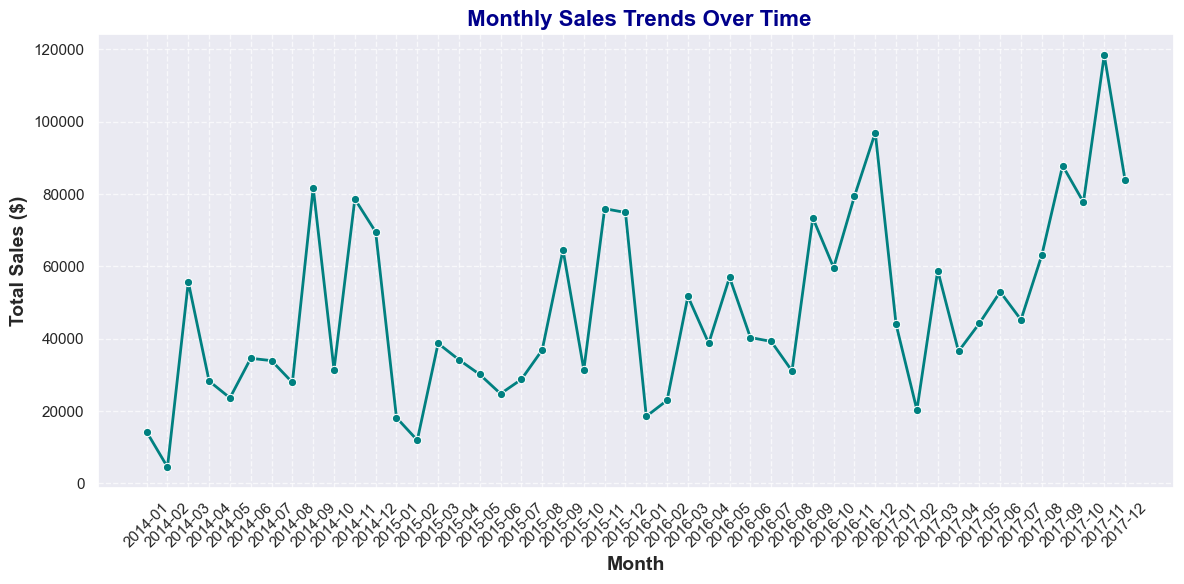

In [14]:
# 1.1 Plot monthly sales trends over time
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales['Month'].astype(str), y=monthly_sales['Sales'], marker='o', color='teal', lw=2)
plt.title(' Monthly Sales Trends Over Time', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 1.2 Identify the Best/Worst Months for Profit

- **Data Preparation**:
  - I grouped the data by month to calculate the total profit for each month, similar to how I did for the sales trends.
  
- **Plotting**:
  - I used a bar plot to represent the monthly profit, which helps in visualizing the differences between the months.
  - The bars are color-coded in a gradient (from red for low profits to green for high profits) to visually emphasize the best and worst months.

- **Customization**:
  - I used a title and axis labels to clarify the plot’s purpose.
  - The y-axis label was adjusted to indicate the total profit for each month in dollars.
  - I rotated the x-axis labels for better readability, especially since month names can get long.

- **Insights**:
  - By examining the plot, I can easily pinpoint which months yielded the highest and lowest profits, helping to uncover any seasonal trends or areas that need improvement.


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

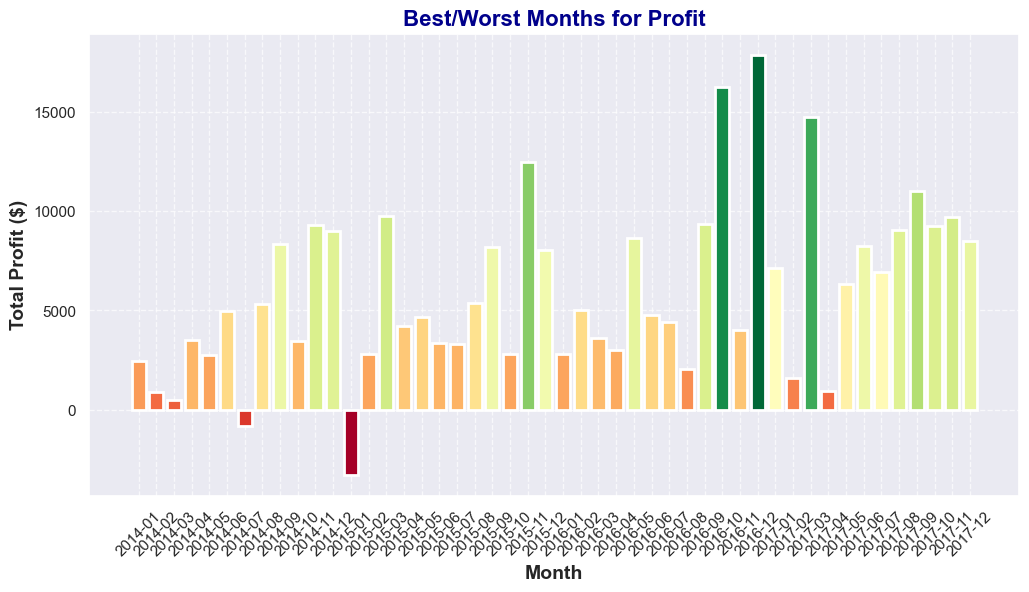

In [15]:
# 1.2 Identify the Best/Worst Months for Profit
monthly_profit = df.groupby('Month')['Profit'].sum().reset_index()

# Normalize the profit values for color mapping
norm = plt.Normalize(vmin=monthly_profit['Profit'].min(), vmax=monthly_profit['Profit'].max())

# Create a color map 
cmap = plt.get_cmap('RdYlGn')  # Using normal RdYlGn, where green is positive and red is negative

# Apply the color map to the profit values
monthly_profit['Color'] = monthly_profit['Profit'].apply(lambda x: cmap(norm(x)))

# Plotting
plt.figure(figsize=(12, 6))

# Use the color values in the 'Color' column for bar colors
bars = plt.bar(monthly_profit['Month'].astype(str), monthly_profit['Profit'], 
               color=monthly_profit['Color'], lw=2)

# Titles and labels
plt.title('Best/Worst Months for Profit', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Total Profit ($)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Add a color bar to indicate the profit ranges
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # We don't need any data for the color bar
plt.colorbar(sm, label='Profit Value')

plt.tight_layout()
plt.show()




### 1.3 Does Higher Discount Lead to Higher Sales?

I created a scatter plot to explore whether there is a relationship between the **Discount** and **Sales**. The plot shows the **Discount** on the x-axis and **Sales** on the y-axis. To further analyze the relationship, I added a regression line to observe any potential linear pattern.

**Findings**:
- The regression line appears **horizontal**, indicating **no strong correlation** between the two variables.
- This suggests that **Sales** do not significantly change based on the **Discount** applied in this dataset.
- A horizontal regression line means that, in this dataset, **Sales** seem to be **unaffected** by changes in **Discount**.

In [ ]:
# Scatter plot with transparency and fit a regression line
plt.figure(figsize=(10, 6))

# Scatter plot with alpha for transparency and different marker
sns.regplot(data=df, x='Discount', y='Sales', scatter_kws={'s': 50, 'alpha': 0.6, 'color': 'orange'}, line_kws={'color': 'blue', 'lw': 2})

# Add title and labels
plt.title('Discount vs Sales with Linear Fit', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Discount (%)', fontsize=14, fontweight='bold')
plt.ylabel('Sales ($)', fontsize=14, fontweight='bold')

# Show the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




### Customer Analysis Answers:

1. **Who are the top 5 most profitable customers?**
TC-20980,
RB-19360,
SC-20095,
HL-15040,
AB-10105

2. **Which ship mode (Standard, Express, etc.) is most commonly used?**
 Standard Class

#### **1.1 Top 5 Most Profitable Customers**
To identify the top 5 most profitable customers, I grouped the dataset by **Customer ID** and summed up the profit for each customer. Then, I sorted these customers by total profit in descending order to highlight the top 5.

In [ ]:
# 1.1 Top 5 Most Profitable Customers
top_customers = df.groupby('Customer ID')['Profit'].sum().reset_index()
top_customers = top_customers.sort_values(by='Profit', ascending=False).head(5)

# Visualize the top 5 customers' profits
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers['Customer ID'], y=top_customers['Profit'], palette='Blues_d')
plt.title('Top 5 Most Profitable Customers', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Customer ID', fontsize=14, fontweight='bold')
plt.ylabel('Total Profit ($)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




### 1.2 Most Commonly Used Ship Mode

To determine the most frequently used shipping method, I analyzed the **Ship Mode** column. The method with the highest frequency represents the most commonly used shipping option. Understanding this can help the business optimize its logistics and focus on the preferred delivery methods of customers.

In [ ]:
# 1.2 Most Commonly Used Ship Mode
ship_mode_counts = df['Ship Mode'].value_counts().reset_index()
ship_mode_counts.columns = ['Ship Mode', 'Count']

# Visualize the most commonly used ship mode
plt.figure(figsize=(10, 6))
sns.barplot(x=ship_mode_counts['Ship Mode'], y=ship_mode_counts['Count'], palette='Pastel1')
plt.title('Most Commonly Used Ship Mode', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Ship Mode', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. Data Mining (20 pts)

#### 4.1 Correlation Analysis: Is there a relationship between Sales, Quantity, and Profit?

To explore whether there is a relationship between **Sales**, **Quantity**, and **Profit**, I used the `df.corr()` function to compute the correlation matrix. The correlation values help in understanding if there are strong linear relationships between these variables.

- A correlation close to **1** indicates a strong positive relationship, whereas a correlation close to **-1** indicates a strong negative relationship.
- A value near **0** suggests no significant linear relationship.

Based on the correlation matrix, we can draw insights regarding the strength and direction of the relationships.

In [ ]:
# 4.1 Correlation Analysis: Is there a relationship between Sales, Quantity, and Profit?
correlation_matrix = df[['Sales', 'Quantity', 'Profit']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Sales, Quantity, Profit", fontsize=16)
plt.show()

#### 4.2 Anomaly Detection: Find Orders with Unusually High Profit Margin or Losses

To detect anomalies, I identified orders with unusually high **Profit Margin** (greater than 50%) and orders with **losses** (Profit < 0). For this, I created a new column **Profit Margin** and filtered the dataset for values greater than 50%.

- **Profit Margin** is calculated using the formula:  
  `Profit Margin = (Profit / Sales) * 100`

I flagged orders with **Profit Margin > 50%** as unusual high-profit orders and orders with **Profit < 0** as loss orders.




In [ ]:
max_profit_margin = df['Profit Margin'].max()
print(f"Maximum Profit Margin: {max_profit_margin:.2f}%")


In [ ]:
# High Profit Margin (> 50%)
high_margin = df[df['Profit Margin'] > 50]
print("Orders with Profit Margin > 50%:")
print(high_margin[['Order ID', 'Sales', 'Profit', 'Profit Margin']])

# Losses (Profit < 0)
loss_orders = df[df['Profit'] < 0]
print("\nOrders with Negative Profit:")
print(loss_orders[['Order ID', 'Sales', 'Profit']])




#### 4.3 Segmentation: Group Customers by Sales (High, Medium, Low) Using Quantiles

To categorize customers by their sales performance, I grouped customers into **High**, **Medium**, and **Low** based on their total sales. This was done using quantiles to ensure a balanced distribution across the segments.

- **High** sales customers are those whose sales fall into the highest quantile.
- **Low** sales customers are those whose sales fall into the lowest quantile.
- **Medium** sales customers fall in between.

This segmentation can help target different customer groups for tailored marketing or sales strategies.

---

In [ ]:
# Segmenting customers by sales (High, Medium, Low) using quantiles
# We will create a new column 'Segment' based on sales quantiles

# Define quantiles for segmentation
quantiles = [0, 0.33, 0.66, 1.0]
labels = ['Low', 'Medium', 'High']

# Assigning the segment to each customer based on their sales value
df['Segment'] = pd.qcut(df['Sales'], q=quantiles, labels=labels)

# Check the distribution of customers across segments
segment_counts = df['Segment'].value_counts()
print(segment_counts)

# Optional: Display the first few rows to verify the 'Segment' column
df.head()


***

### FOR Reccomendation: Further Analaysis

In [ ]:
# Analyze Profitability by Sub-Category
subcategory_profit = df.groupby('Sub-Category').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Average_Profit_Margin=('Profit Margin', 'mean'),
    Total_Orders=('Order ID', 'nunique')
).reset_index().sort_values(by='Total_Profit')

print("Profitability by Sub-Category (Sorted by Total Profit):")
print(subcategory_profit.to_markdown(index=False, numalign="left", stralign="left"))

In [ ]:
# Analyze Profitability by Region
region_profit = df.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Average_Profit_Margin=('Profit Margin', 'mean'),
    Total_Orders=('Order ID', 'nunique')
).reset_index().sort_values(by='Total_Profit')

print("\nProfitability by Region (Sorted by Total Profit):")
# The .to_markdown() part is just for display formatting
print(region_profit.to_markdown(index=False, numalign="left", stralign="left"))

In [ ]:
# Analyze Profitability by State (Top 10 Least Profitable)
state_profit = df.groupby('State').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Average_Profit_Margin=('Profit Margin', 'mean'),
    Total_Orders=('Order ID', 'nunique')
).reset_index().sort_values(by='Total_Profit')

print("\nTop 10 Least Profitable States (Sorted by Total Profit):")
# The .head(10) selects the top 10 rows (least profitable after sorting)
# The .to_markdown() part is just for display formatting
print(state_profit.head(10).to_markdown(index=False, numalign="left", stralign="left"))

In [ ]:
# Analyze Relationship between Discount and Profit
discount_profit = df.groupby('Discount').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Average_Profit_Margin=('Profit Margin', 'mean'),
    Total_Orders=('Order ID', 'nunique')
).reset_index()

print("\nProfitability by Discount Level:")
# The .to_markdown() part is just for display formatting
print(discount_profit.to_markdown(index=False, numalign="left", stralign="left"))

In [ ]:
# Filter orders with negative profit
negative_profit_orders = df[df['Profit'] < 0]

# Count unique negative profit orders
num_negative_profit_orders = negative_profit_orders['Order ID'].nunique()

# Get total unique orders
total_unique_orders = df['Order ID'].nunique()

# Calculate percentage
percentage_negative_profit = num_negative_profit_orders / total_unique_orders

print(f"\nTotal orders with negative profit: {num_negative_profit_orders}")
print(f"Percentage of orders with negative profit: {percentage_negative_profit:.2%}")